In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/household_power_consumption.txt", delimiter=";", na_values=["?"])
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

data.drop(columns=['Date', 'Time'], inplace=True)
data.set_index('datetime', inplace=True)

print(data.isnull().sum())
data.interpolate(method='linear', inplace=True)
data_resampled = data.resample('T').mean()
print(data_resampled.head())
data_resampled.to_csv("./data/household_power_consumption_cleaned.csv")

/tmp/ipykernel_38682/3225339356.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


/tmp/ipykernel_38682/3225339356.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data.resample('T').mean()


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [3]:
cols = ['datetime',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [4]:
df = pd.read_csv("./data/household_power_consumption_cleaned.csv")
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


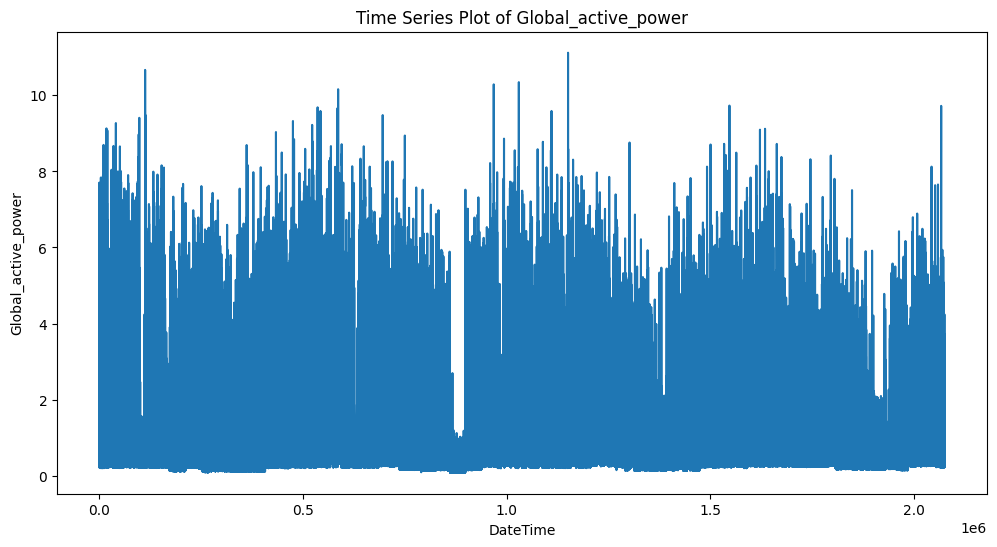

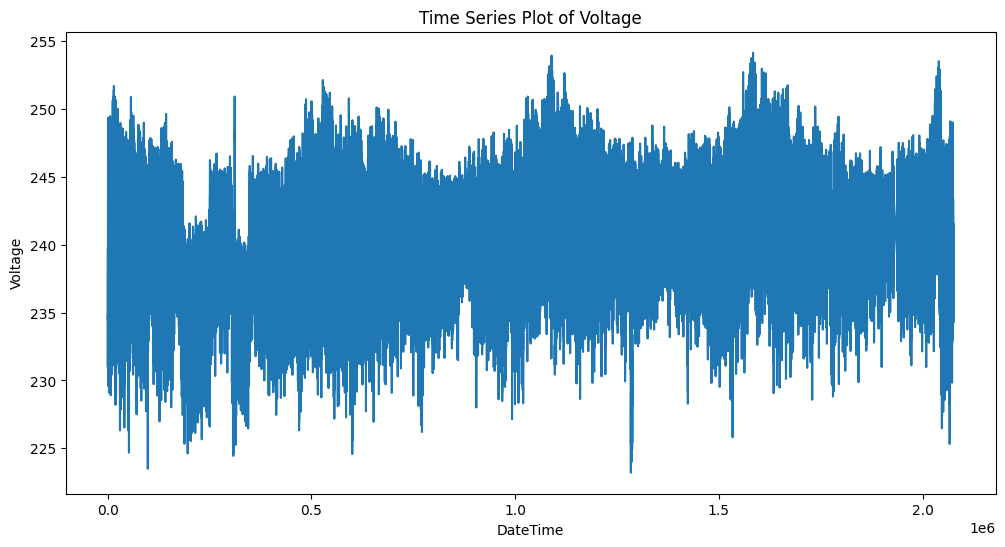

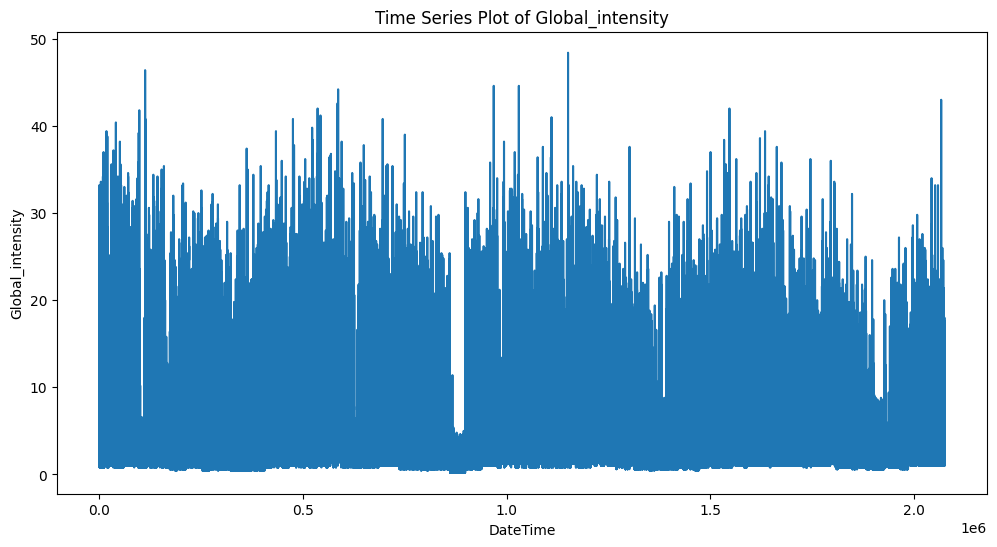

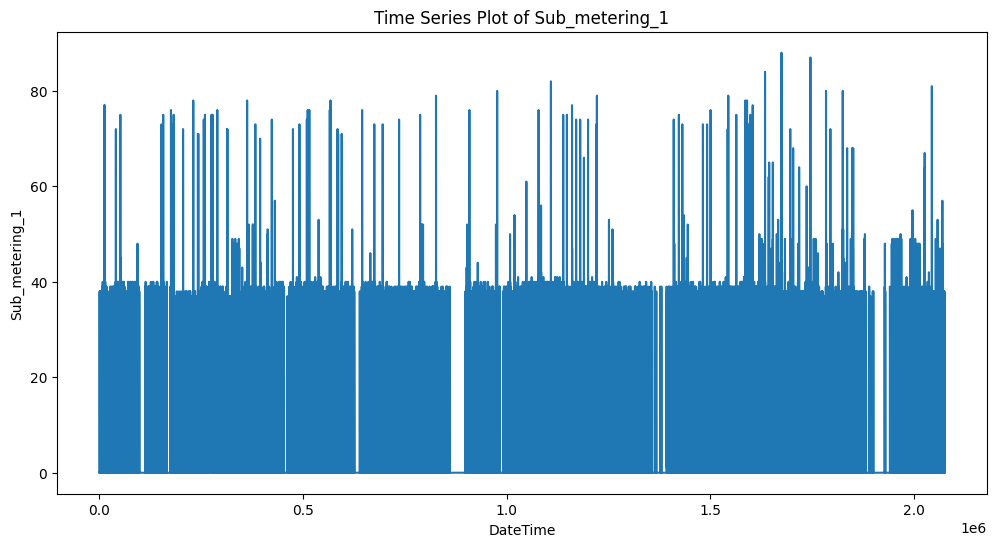

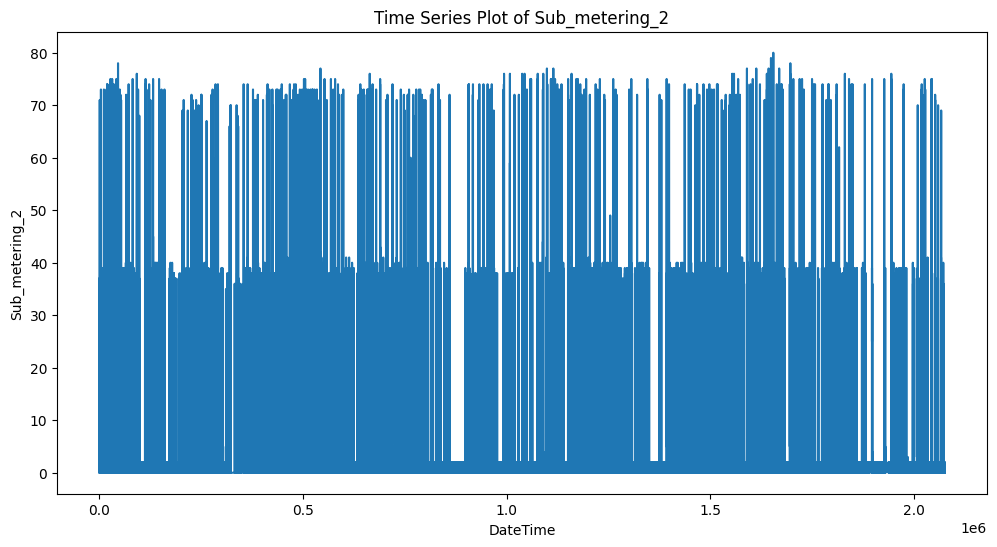

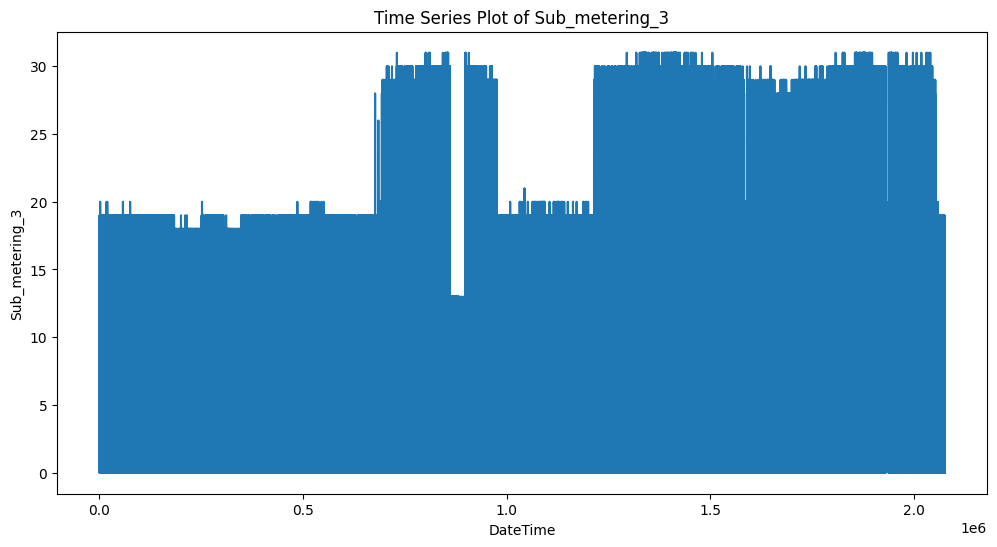

In [5]:
for col in ['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    plt.figure(figsize=(12, 6))
    df[col].plot()
    plt.title(f'Time Series Plot of {col}')
    plt.xlabel('DateTime')
    plt.ylabel(col)
    plt.show()

### Rolling statistics
Rolling statistics, including moving averages and rolling standard deviations, smooth out short-term noise to highlight longer-term trends and variations. The rolling mean shows how the average value changes over time, revealing trends, while the rolling standard deviation highlights periods of increased or decreased volatility, indicating stability or fluctuations in the data.

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


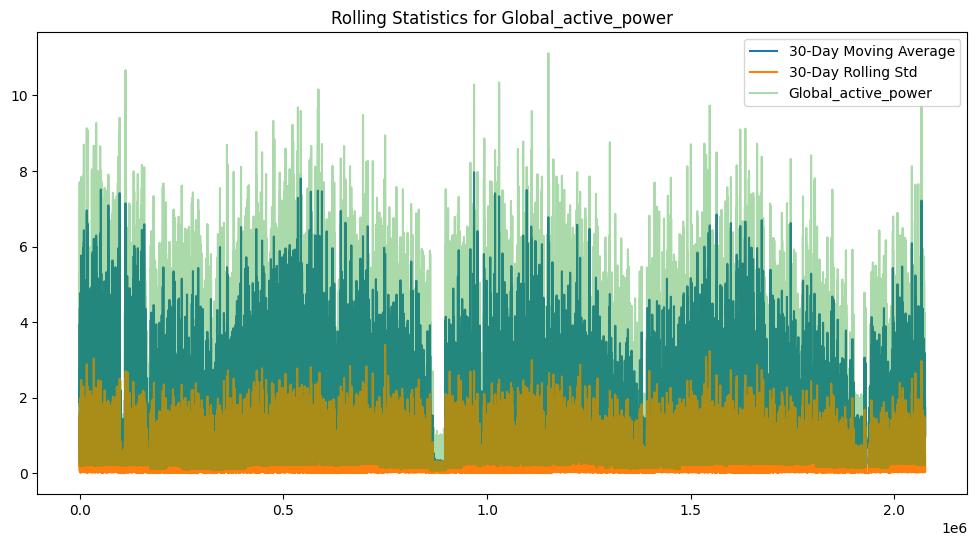

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


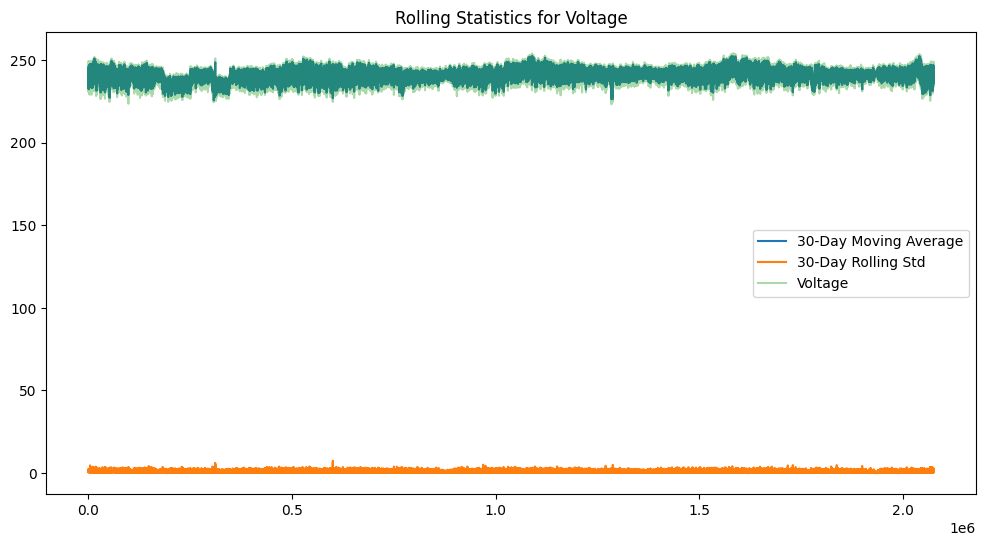

/home/vajradevam/Code/miniproject/VENV/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


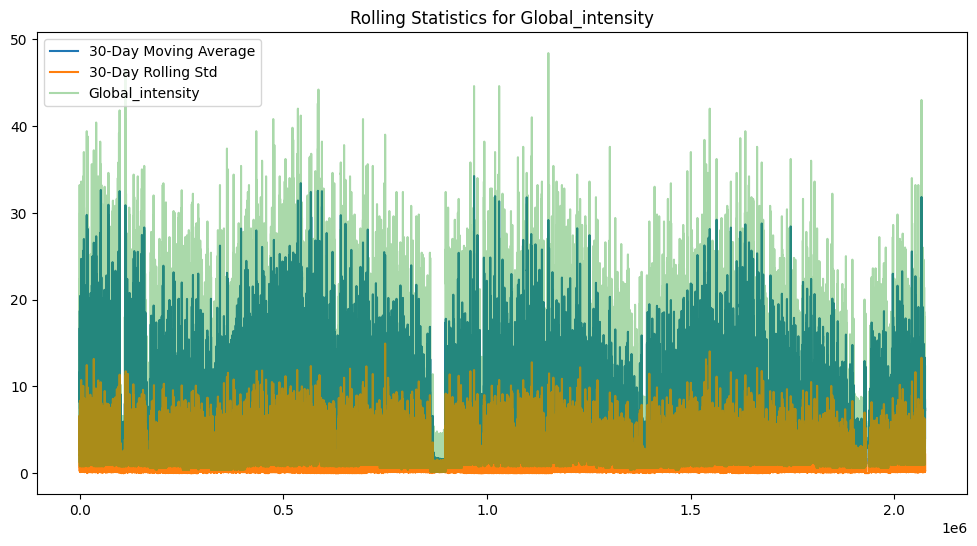

In [6]:
for col in ['Global_active_power', 'Voltage', 'Global_intensity']:
    plt.figure(figsize=(12, 6))
    df[col].rolling(window=30).mean().plot(label='30-Day Moving Average')
    df[col].rolling(window=30).std().plot(label='30-Day Rolling Std')
    df[col].plot(alpha=0.4)
    plt.legend()
    plt.title(f'Rolling Statistics for {col}')
    plt.show()

### Seasonal decomposition
Seasonal decomposition breaks the time series into three components: trend, seasonality, and residuals. The trend shows the overall direction of the data, the seasonal component captures repeating patterns, and the residuals represent random noise. This decomposition helps isolate the underlying patterns, making it easier to understand cyclical behaviors and irregularities in the data.

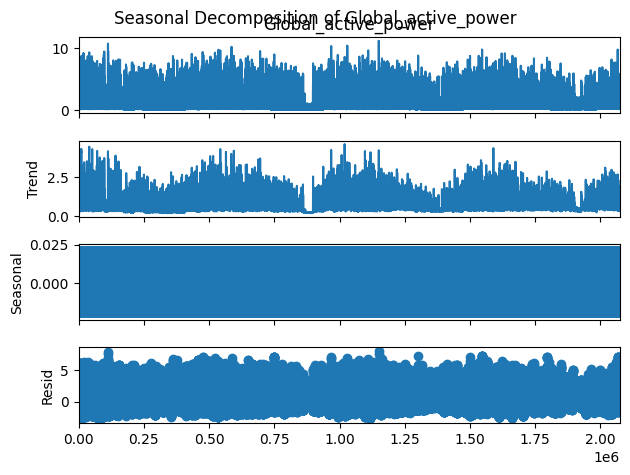

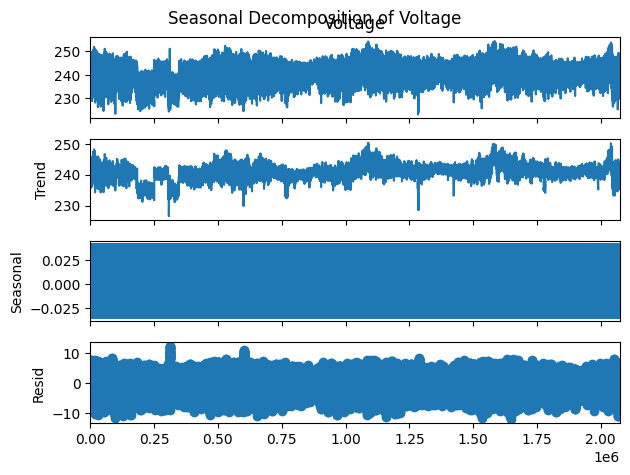

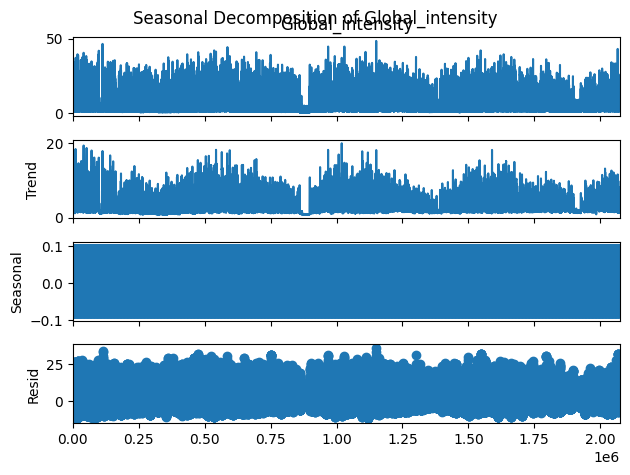

In [7]:
for col in ['Global_active_power', 'Voltage', 'Global_intensity']:
    result = seasonal_decompose(df[col].dropna(), model='additive', period=365)
    result.plot()
    plt.suptitle(f'Seasonal Decomposition of {col}')
    plt.show()